<h1>Feature Engineering</h1>
<h3>* Feature Transformation->Missing values, Handling Categorical data, Outlier Detection, Feature Scaling<br>
* Feature Construction<br>
* Feature Selection
<br>* Feature Extraction</h3>

Feature Scaling


->Standardization

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r'c:\Users\Utsav\Downloads\archive (8)\Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df1=df.iloc[:,2:]

In [5]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop(['Purchased'],axis=1),df1.Purchased)

In [10]:
scaler=StandardScaler()

scaler.fit(x_train) # it will calculate the mean and SD of the x_train data and store it

#Hum fit sirf train data se krte h aur transform dono ko krte hain
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# but it returns numpy array so we have to convert back into dataframe

In [11]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [12]:
x_train_scaled

,Age,EstimatedSalary
0,0.094873,0.121061
1,2.087208,-1.028628
2,0.189746,0.180020
3,-0.853858,0.415854
4,-0.379492,-1.293941
...,...,...
295,1.328223,1.329710
296,0.284619,0.533770
297,0.284619,-0.291648
298,1.043604,-0.969670


In [14]:
import numpy as np 

In [15]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,38.0,68893.3
std,10.6,33978.9
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,67000.0
75%,46.0,87000.0
max,60.0,150000.0


In [16]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.1,2.4


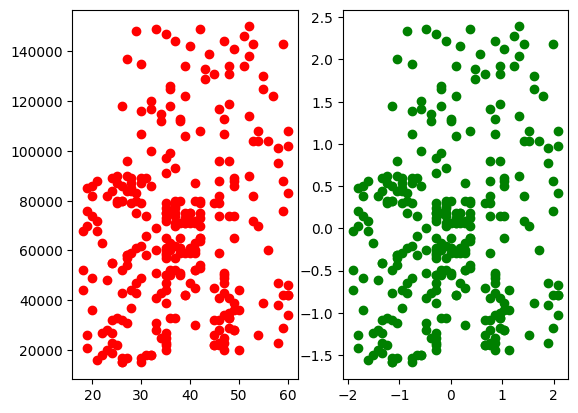

In [22]:
plt.subplot(1,2,1) # 1 row, 2 columns and 1st entry
plt.scatter(x_train['Age'],x_train['EstimatedSalary'],color='r')
plt.subplot(1,2,2)
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')

C:\Users\Utsav\AppData\Local\Temp\ipykernel_12252\292090378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],color='r',hist=False)
C:\Users\Utsav\AppData\Local\Temp\ipykernel_12252\292090378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Estimate

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

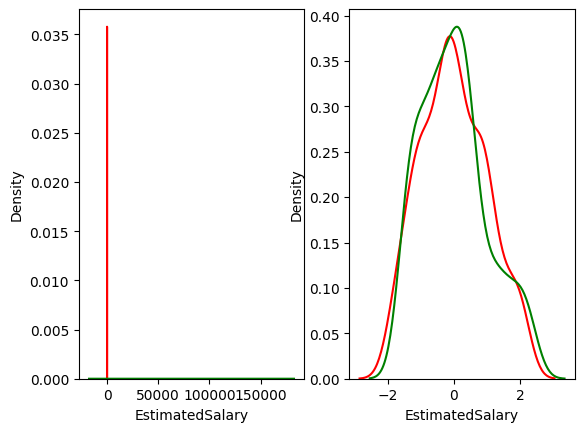

In [29]:
plt.subplot(1,2,1) # 1 row, 2 columns and 1st entry
sns.distplot(x_train['Age'],color='r',hist=False)
sns.distplot(x_train['EstimatedSalary'],color='g',hist=False)
plt.subplot(1,2,2) # 1 row, 2 columns and 1st entry
sns.distplot(x_train_scaled['Age'],color='r',hist=False)
sns.distplot(x_train_scaled['EstimatedSalary'],color='g',hist=False)
#plt.subplot(1,2,2)
#sns.distplot(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')

<Axes: xlabel='Age', ylabel='Density'>

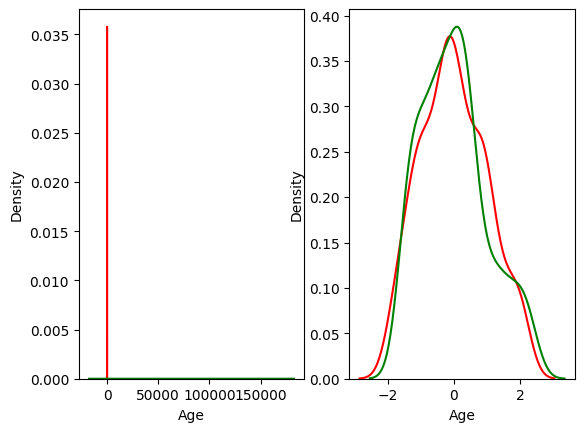

In [32]:
plt.subplot(1,2,1) # 1 row, 2 columns and 1st entry
sns.kdeplot(x_train['Age'],color='r')
sns.kdeplot(x_train['EstimatedSalary'],color='g')
plt.subplot(1,2,2) # 1 row, 2 columns and 1st entry
sns.kdeplot(x_train_scaled['Age'],color='r')
sns.kdeplot(x_train_scaled['EstimatedSalary'],color='g')
#plt.subplot(1,2,2)
#sns.distplot(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')

In [33]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model2=LogisticRegression()

In [34]:
model1.fit(x_train,y_train)
model2.fit(x_train_scaled,y_train)

LogisticRegression()

Effect of scaling on model Accuracy

In [36]:
model1.score(x_test,y_test)

0.69

In [37]:

model2.score(x_test_scaled,y_test)

0.91

Normalization